In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [46]:
file_path = 'processed_used_cars.csv'
df=pd.read_csv(file_path)

In [47]:
df.head()

,brand,model,model_year,fuel_type,price_numeric $,milage_numeric,engine_hp HP,power_to_price,vehicle_age,age_group
0,Ford,Utility Police Interceptor Base,2013,E85 Flex Fuel,10300.0,51000.0,300.0,29.13,12,11-15 years
1,INFINITI,Q50 Hybrid Sport,2015,Hybrid,15500.0,88900.0,354.0,22.84,10,6-10 years
2,Audi,S3 2.0T Premium Plus,2017,Gasoline,31000.0,84000.0,292.0,9.42,8,6-10 years
3,BMW,740 iL,2001,Gasoline,7300.0,242000.0,282.0,38.63,24,21-25 years
4,Lexus,RC 350 F Sport,2021,Gasoline,41927.0,23436.0,311.0,7.42,4,0-5 years


<Axes: xlabel='price_numeric $', ylabel='power_to_price'>

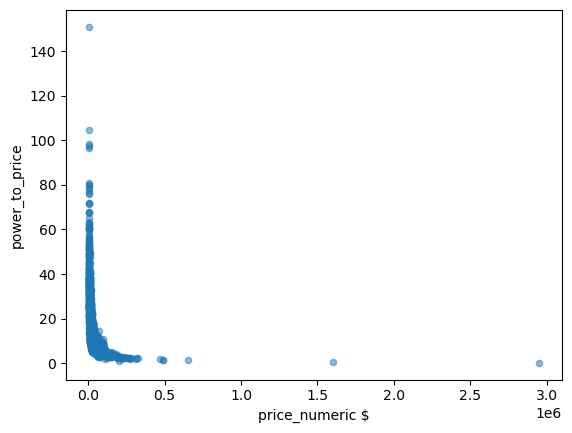

In [48]:
# Plot the price_numeric $ & power_to_price to find out if a linear trend exists
df.plot.scatter(x='price_numeric $', y='power_to_price', alpha=0.5)

<Axes: xlabel='vehicle_age', ylabel='power_to_price'>

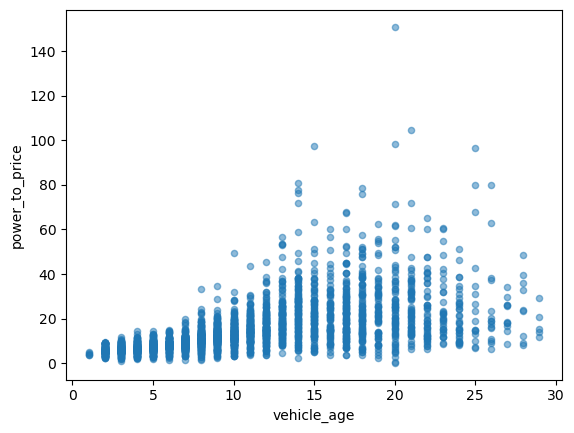

In [49]:
# Plot the vehicle_age & power_to_price to find out if a linear trend exists
df.plot.scatter(x='vehicle_age', y='power_to_price', alpha=0.5)

<Axes: xlabel='model_year', ylabel='power_to_price'>

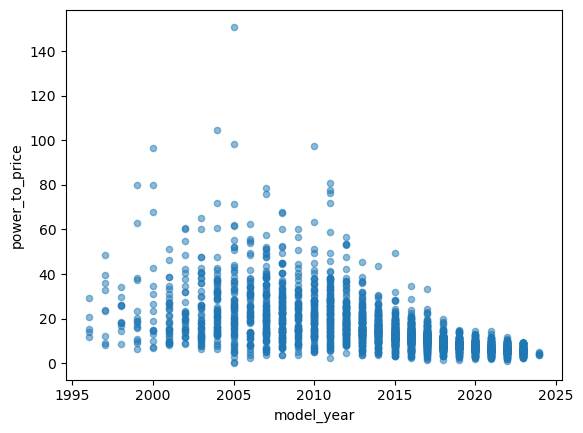

In [50]:
# Plot the model_year & power_to_price to find out if a linear trend exists
df.plot.scatter(x='model_year', y='power_to_price', alpha=0.5)

<Axes: xlabel='milage_numeric', ylabel='power_to_price'>

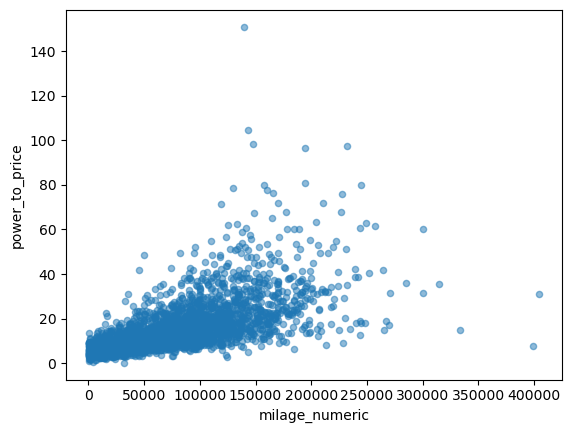

In [51]:
# Plot the milage_numeric & power_to_price to find out if a linear trend exists
df.plot.scatter(x='milage_numeric', y='power_to_price', alpha=0.5)

<Axes: xlabel='engine_hp HP', ylabel='power_to_price'>

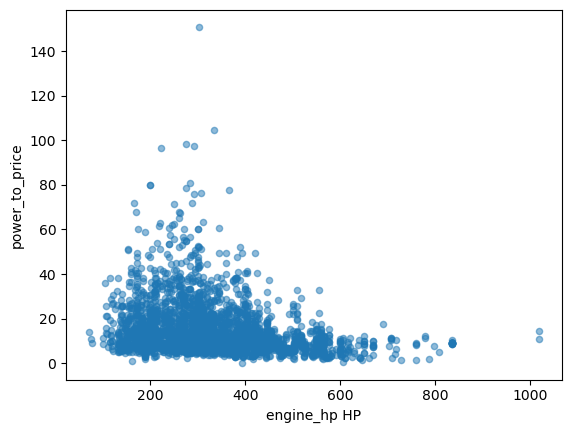

In [52]:
# Plot the engine_hp HP & power_to_price to find out if a linear trend exists
df.plot.scatter(x='engine_hp HP', y='power_to_price', alpha=0.5)

In [53]:
# Assign the variable X to the two features that appear to have the most linear relationship with power_to_price
# Note: scikit-learn requires a two-dimensional array of values
# so we use reshape() to create this

X = df[["milage_numeric", "engine_hp HP"]].values.reshape(-1, 2)
y = df["power_to_price"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (3201, 2) (3201, 1)


In [54]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# Create the model
model = LinearRegression()

In [56]:
# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression()

In [57]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data
# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

mean squared error (MSE): 89.85093142672729
R-squared (R2): 0.3833987517850427


In [58]:
# Call the `score()` method on the model to show the R2 score
model.score(X_test, y_test)

0.3833987517850427